In [0]:
try :
  % tensorflow_version 2.x
except Exception :
 pass
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random # random.shuffle(data)
from collections import Counter #print(Counter(vect))
from sklearn import preprocessing #normalized_X = preprocessing.normalize(x)
from sklearn.model_selection import train_test_split # x_train,x_test,y_train,y_test=train_test_split(normalized_X,y,test_size=0.2)

# **Partie 1 :**  Data Processing

In [0]:
###Load data 
#from keras.datasets import cifar10
lr_train = pd.read_csv('letter_recognition_train_40.csv',header= None) 
lr_test = pd.read_csv('letter-recognition_test.csv',header= None) 

In [0]:
### take a look to the dataset
lr_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,1,3,2,1,6,12,2,7,8,11,8,1,10,1,7
1,G,4,3,5,5,2,8,5,7,9,7,4,11,1,9,5,10
2,J,5,10,4,8,3,10,6,2,4,12,5,7,2,10,5,11
3,Y,3,5,5,7,7,8,4,4,3,7,8,8,5,9,5,8
4,Z,2,4,3,3,1,8,6,2,9,11,5,8,1,8,5,8


In [0]:
lr_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,U,4,10,6,7,9,9,6,4,3,6,7,7,9,8,5,6
1,N,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8
2,V,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10
3,I,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8
4,N,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7


In [0]:
x_train=lr_train.iloc[:,1:17]
y_train=lr_train.iloc[:,0]
x_test=lr_test.iloc[:,1:17]
y_test=lr_test.iloc[:,0]

In [0]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,1,3,2,1,6,12,2,7,8,11,8,1,10,1,7
1,4,3,5,5,2,8,5,7,9,7,4,11,1,9,5,10
2,5,10,4,8,3,10,6,2,4,12,5,7,2,10,5,11
3,3,5,5,7,7,8,4,4,3,7,8,8,5,9,5,8
4,2,4,3,3,1,8,6,2,9,11,5,8,1,8,5,8


In [0]:
y_train.head()

0    T
1    G
2    J
3    Y
4    Z
Name: 0, dtype: object

It is a classification problem with 26 class
So, so we have to categorize the target and put it in vector


In [0]:
def to_vector(target,alphabet,vect_len=26):
  vect=[0 for i in range(vect_len)]
  vect[np.where(alphabet == target)[0][0]]=1
  return vect

In [0]:
np.sort(y_train.unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [0]:
alphabet=np.sort(y_train.unique())
y_train_vect=[]
for y in y_train:
  y_train_vect.append(to_vector(y,alphabet))

In [0]:
y_test_vect=[]
for y in y_test:
  y_test_vect.append(to_vector(y,alphabet))

In [0]:
##For ex : Z==>[0,0,0,0,....,0,1]
print(y_train_vect[0:5])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]


In [0]:
#observe the shape of X pour input_Shape
x_train.shape

(16000, 16)

In [0]:
#observe the shape of y pour output layer
print(len(y_train_vect))
print(len(y_train_vect[0]))

16000
26


In [0]:
x_train_list=x_train.values
x_train_list = x_train_list.tolist()
print(type(x_train_list))
print(x_train_list[0:5])

<class 'list'>
[[2, 1, 3, 2, 1, 6, 12, 2, 7, 8, 11, 8, 1, 10, 1, 7], [4, 3, 5, 5, 2, 8, 5, 7, 9, 7, 4, 11, 1, 9, 5, 10], [5, 10, 4, 8, 3, 10, 6, 2, 4, 12, 5, 7, 2, 10, 5, 11], [3, 5, 5, 7, 7, 8, 4, 4, 3, 7, 8, 8, 5, 9, 5, 8], [2, 4, 3, 3, 1, 8, 6, 2, 9, 11, 5, 8, 1, 8, 5, 8]]


In [0]:
n_train =int((len(x_train)-1)*0.8)
trainX , valX = x_train_list[: n_train], x_train_list[ n_train :]
trainy , valy = y_train_vect[: n_train ], y_train_vect[ n_train :]

*No need to normalize the dataset (already done)*

The output of the block is the 4 data vect :
*   trainX & trainy for trainning
*   valX & valy for validation
*   x_test & y_test_vect for testing






# **Partie 2 :** Model NN 

## Determine the model with the best size

In [0]:
def build_model(taille):

  model = keras.Sequential([keras.layers.Dense(taille,activation='relu',input_shape=(16,)),
                            keras.layers.Dense(taille +10, activation='relu'),#(Optional)here I add (+10) so the nb of node be closer to 26 the node nb of the output  layer 
                            keras.layers.Dense(26,activation='softmax')## taille du traget, nb class > 2 ==>activation='softmax'
  ])
    

  #dense = poids toutes les neurones, elles sont toutes connectées av les neurones du niveau inferieur
  #dense c'est pas la meilleur car demande bcp (par default)     
  #input shape c la longue des variable, ici 16      
  #pas de input shape pr la deuxime couche car si c dense pas besoin

  model.compile(optimizer ='rmsprop',loss='categorical_crossentropy', metrics=['acc'])
  #rmsprop = methode adapattive de la descente de gradient
  #c'est le nb class > 2 alors faudra mettre "categorical_crossentropy" 
  # metrics=> pour classification, c'est  "acc" accuracy
  return model

In [0]:
model_1=build_model(5)
model_2=build_model(10)
model_3=build_model(25)

In [0]:
model_1.summary()
model_2.summary()
model_3.summary()
#nb of params shouldn't be high if the input is only 16 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 5)                 85        
_________________________________________________________________
dense_34 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_35 (Dense)             (None, 26)                416       
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_37 (Dense)             (None, 20)                220       
________________________________

In [0]:
model_1_hist= model_1.fit( trainX , trainy , validation_data =( valX , valy ),epochs= 200, batch_size=64)

In [0]:
model_2_hist= model_2.fit( trainX , trainy , validation_data =( valX , valy ),epochs= 200, batch_size=64)

In [0]:
model_3_hist= model_3.fit( trainX , trainy , validation_data =( valX , valy ),epochs= 200, batch_size=64)

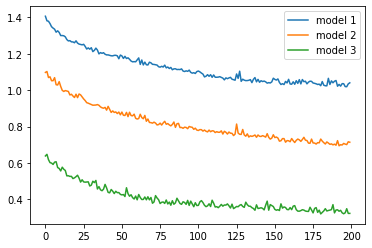

In [0]:
##Ploting the val_acc val loss and overfitting
plt.plot(model_1_hist.history['val_loss'],label="model 1" )
plt.plot(model_2_hist.history['val_loss'],label="model 2")
plt.plot(model_3_hist.history['val_loss'],label="model 3")
plt.legend()
plt.show() 

After seeing the plot of the val_loss of each model , we can tell that the extraction of the letter feature and the split was very good , there are no-overfitting in any model

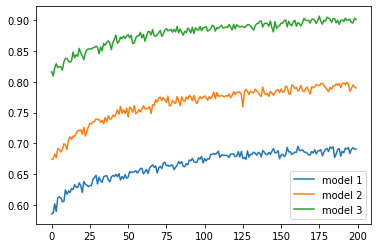

In [0]:
##Ploting the val_acc
#plt.plot(net_11_hist.history["acc"],label="acc" )pas besion ici
plt.plot(model_1_hist.history["val_acc"],label="model 1")
plt.plot(model_2_hist.history["val_acc"],label="model 2")
plt.plot(model_3_hist.history["val_acc"],label="model 3")
plt.legend()
plt.show() 

### "the explanation most likely to be correct is the "simplest" one", the one that makes the least amount of assumptions. This is called "Occam's Razor principle".

After seeing the plot of the val_acc of each model , we can tell that the accuracy increase and the model 3 has the best one 

So I choose to implment the **Model 2** with avg time of calculation and better acc than model_1 (acc> 75%)

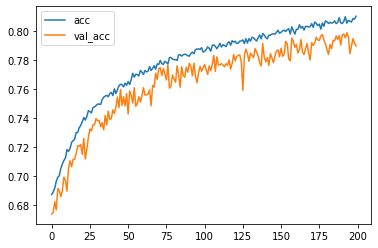

In [0]:
#acc changing w.r.t epochs for the trained and validation data
plt.plot(model_2_hist.history["acc"],label="acc")
plt.plot(model_2_hist.history["val_acc"],label="val_acc")
plt.legend()
plt.show() 

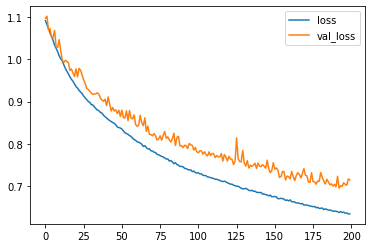

In [0]:
 #loss changing w.r.t epochs for the trained and validation data
plt.plot(model_2_hist.history["loss"],label="loss")
plt.plot(model_2_hist.history["val_loss"],label="val_loss")
plt.legend()
plt.show() 

In [0]:
 loss_2 , acc_2 = model_2.evaluate(x_test.values.tolist(), y_test_vect , verbose =2)

4000/4000 - 0s - loss: 0.7334 - acc: 0.7785


## anti-Overfitting
(As proven in the last section , the model don't overfit , so no need for this part , but no harm let's test it it may be get the model better )

In [0]:
##regularizers
from keras import regularizers
l2_model=keras.Sequential ([  
                             keras.layers.Dense (10 , activation ='relu',kernel_regularizer=regularizers.l2(0.001)) ,        
                             keras.layers.Dense (20 , activation ='relu',kernel_regularizer=regularizers.l2(0.001)),
                             keras.layers.Dense (26  , activation ='softmax') ])  
l2_model.compile ( optimizer ='rmsprop', loss ='categorical_crossentropy',metrics =['acc'])
L2_m_hist=l2_model.fit(trainX , trainy , epochs =200,validation_data=(valX,valy))

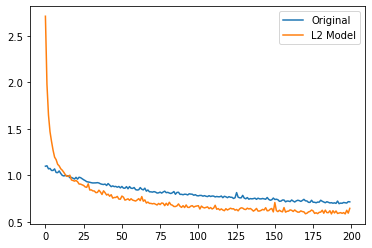

In [0]:
plt.plot(model_2_hist.history['val_loss'],label="Original" )
plt.plot(L2_m_hist.history['val_loss'],label="L2 Model")
plt.legend()
plt.show() 

In [0]:
##DropOut
dpt_model=keras.Sequential ([  
                              keras.layers.Dense (10 , activation ='relu'),keras.layers.Dropout(0.5) ,        
                              keras.layers.Dense (20 , activation ='relu'),keras.layers.Dropout(0.5),
                              keras.layers.Dense (26  , activation ='softmax') ])  
dpt_model.compile ( optimizer ='rmsprop', loss ='categorical_crossentropy',metrics =['acc'])
dpt_model_hist=dpt_model.fit(trainX , trainy , epochs =200,validation_data=(valX,valy))

In [0]:
dpt2_model=keras.Sequential ([  
                              keras.layers.Dense (10 , activation ='relu'),keras.layers.Dropout(0.2) ,        
                              keras.layers.Dense (20 , activation ='relu'),keras.layers.Dropout(0.2),
                              keras.layers.Dense (26  , activation ='softmax') ])  
dpt2_model.compile ( optimizer ='rmsprop', loss ='categorical_crossentropy',metrics =['acc'])
dpt2_model_hist=dpt2_model.fit(trainX , trainy , epochs =200,validation_data=(valX,valy))

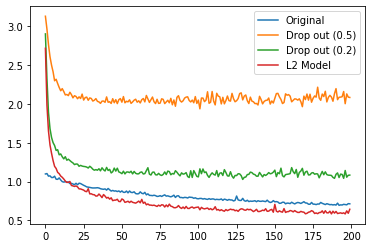

In [0]:
#Ploting to compare 
plt.plot(model_2_hist.history['val_loss'],label="Original" )
plt.plot(dpt_model_hist.history['val_loss'],label="Drop out (0.5)")
plt.plot(dpt2_model_hist.history['val_loss'],label="Drop out (0.2)")
plt.plot(L2_m_hist.history['val_loss'],label="L2 Model")
plt.legend()
plt.show()
## less loss better model so the L2 model is colser to the original but a little better  
## so to generalize the L2 model could resistant more to overfitting than the original model

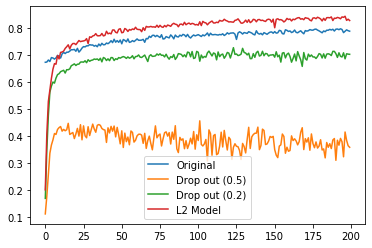

In [0]:
plt.plot(model_2_hist.history['val_acc'],label="Original" )
plt.plot(dpt_model_hist.history['val_acc'],label="Drop out (0.5)")
plt.plot(dpt2_model_hist.history['val_acc'],label="Drop out (0.2)")
plt.plot(L2_m_hist.history['val_acc'],label="L2 Model")
plt.legend()
plt.show()

# **Partie 3 :** Choix d'optimiseur et Lrate

In [0]:
# fit a model and plot learning curve
def fit_model_opt(trainX, trainY, testX, testY, optimizer):
# define model
  model = keras.Sequential([ keras.layers.Dense(10,activation='relu',input_shape=(16,)),
                            keras.layers.Dense(20, activation='relu', kernel_initializer='he_uniform'),
                            keras.layers.Dense(26, activation='softmax')
  ])
# compile model
  model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['acc'])
# fit model
  history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, verbose=0)
# plot learning curves
  plt.plot(history.history['acc'], label='train')
  plt.plot(history.history['val_acc'], label='test')
  plt.title('optimizer='+str(optimizer), pad=-80)

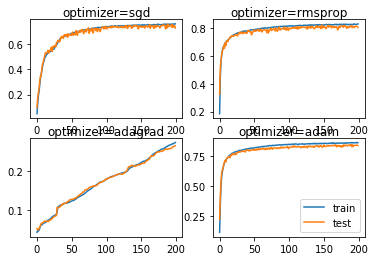

In [0]:
methods = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(methods)):
# determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
# fit model and plot learning curves for a decay rate
  fit_model_opt(trainX, trainy, valX, valy, methods[i])
# show learning curves
plt.legend()
plt.show()

We can see :
* the best optimizer for this data are the rmsprop and adam .
* sgd is also close to them.
 
 So, i will choose the rmsprop as i was using it by default 


**Lrate**

In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
def fit_model_lrate(ftrainX, ftrainy, ftestX, ftesty,flrate, itr):
  fmodel = keras.Sequential([ keras.layers.Dense(10,activation='relu',input_shape=(16,)),
                             keras.layers.Dense(20,activation='relu'),
                             keras.layers.Dense(26,activation='softmax')
                          ])
  fmodel.compile ( loss ='categorical_crossentropy', optimizer =RMSprop(flrate), metrics =[ 'accuracy'])
  fhistory = fmodel.fit ( ftrainX , ftrainy , validation_data =( ftestX , ftesty ), epochs =itr , verbose =0)
  plt.plot ( fhistory.history['accuracy'], label ='train',color = 'r')
  plt.plot ( fhistory.history ['val_accuracy'], label ='test', color = 'b')
  plt.title ('lrate ='+ str ( flrate ), pad = -50)

In [0]:
plt.rcParams["figure.figsize"]=(20,10)

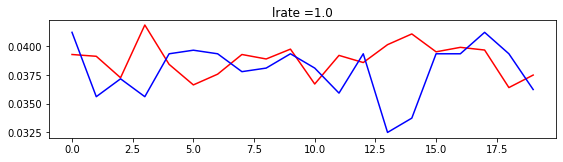

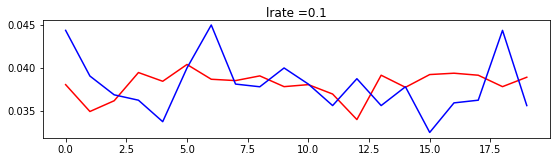

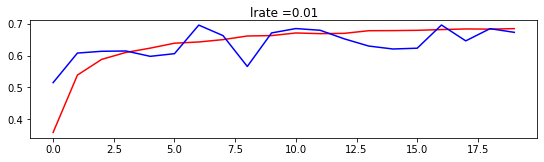

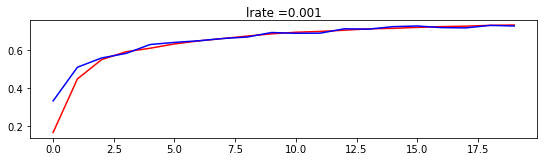

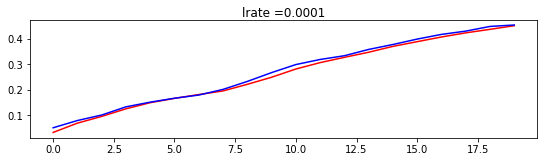

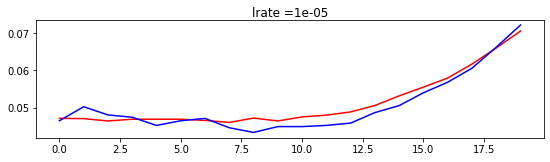

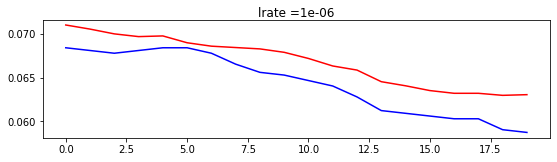

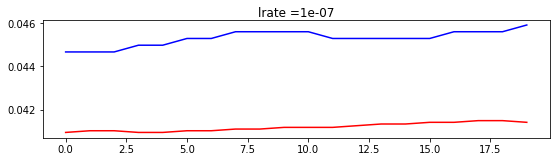

In [0]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range ( len ( learning_rates )):
  # determine the plot number
  plot_no = 420 + (i +1)
  plt.subplot ( plot_no )
  # fit model and plot learning curves for a learning rate
  fit_model_lrate( trainX , trainy , valX , valy , learning_rates [i],20)
  # show learning curves
  plt.show ()

We can see :
* the best lrate behaviour for this data are the 0.001 and 0.0001 .
* After that the acc get down to less than 1%
* the acc of the 0.001 is better than the other (60%)
 
 So, i will choose the 0.001 as the lrate  as i was used it by default 

# **Partie 4 :**  Predict & Evaluate

Final model with final loss accuracy values on your test set.

In [0]:
from tensorflow import keras
Best_model = keras.Sequential([ keras.layers.Dense(10,activation='relu',input_shape=(16,),kernel_regularizer=regularizers.l2(0.001)),
                                keras.layers.Dense(20,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                                keras.layers.Dense(26,activation='softmax')])
Best_model.compile ( loss ='categorical_crossentropy', optimizer = RMSprop(), metrics =[ 'accuracy'])
Best_model_history = Best_model.fit ( trainX , trainy , validation_data =( valX , valy ), epochs = 20, verbose =0)

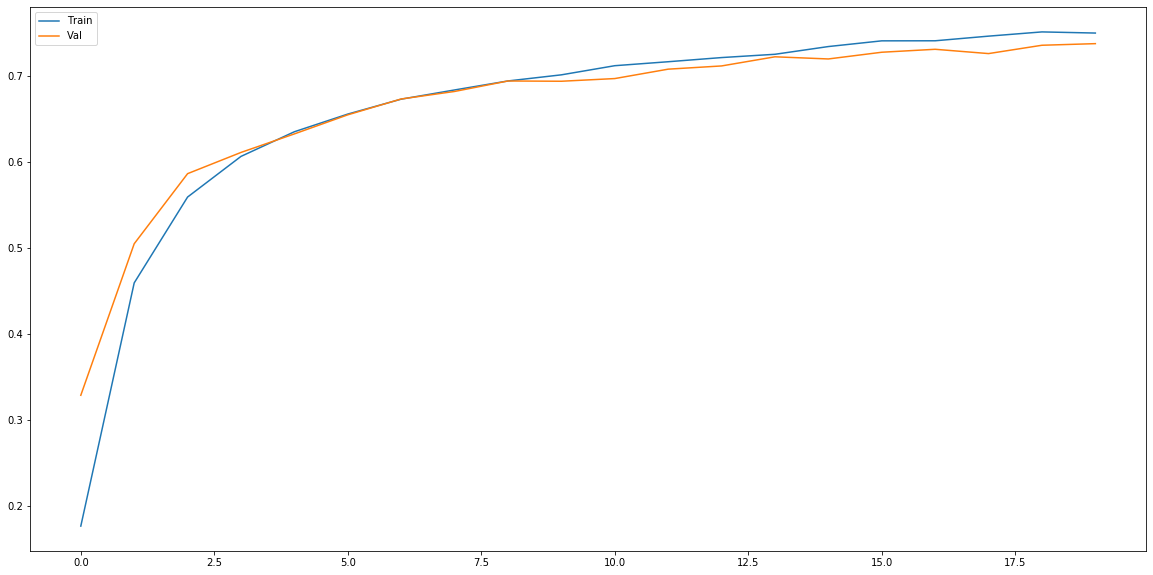

In [0]:
plt.plot ( Best_model_history.history['accuracy'], label ='Train')
plt.plot (Best_model_history.history ['val_accuracy'], label ='Val')
plt.legend()
plt.show()

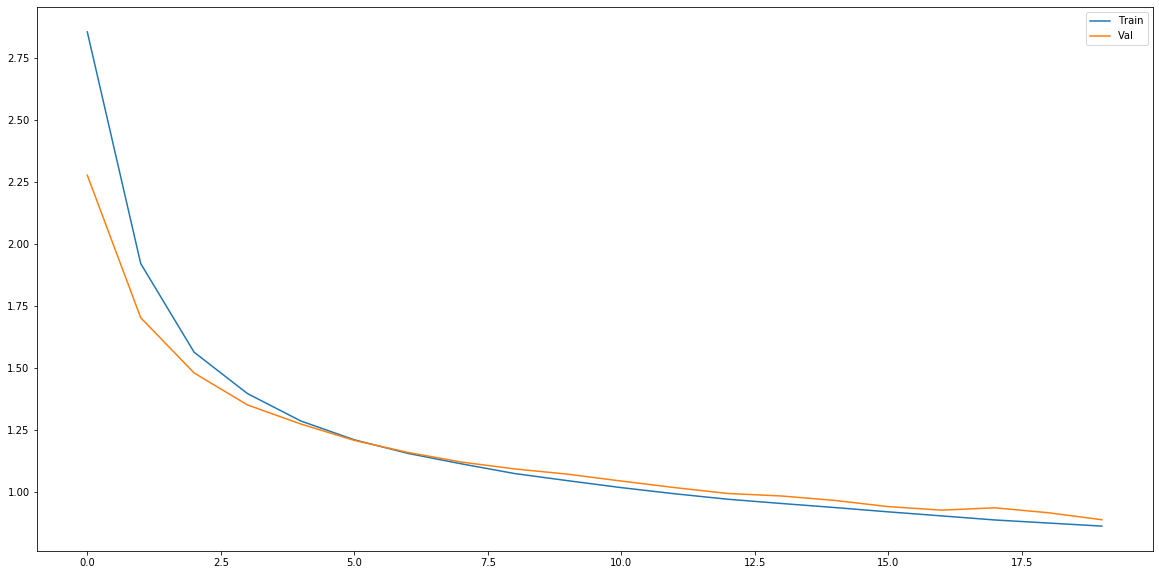

In [0]:
plt.plot (Best_model_history.history['loss'], label ='Train')
plt.plot (Best_model_history.history['val_loss'], label ='Val')
plt.legend()
plt.show()

In [0]:
predictions = Best_model.predict(x_test.values.tolist())

In [0]:
print(predictions[1:4])
print(np.argmax(predictions[1:4], axis = 1))
print(test_targets[1:4])

In [0]:
loss_2 , acc_2 = Best_model.evaluate( x_test.values.tolist() , y_test_vect , verbose =2)

4000/4000 - 0s - loss: 0.9176 - accuracy: 0.7408
